# MSD of a Quasiperiodic Array obtained with various random points

In [1]:
#The following packages are required:
using Plots
using DelimitedFiles
using LinearAlgebra

#The following files are required:
include("Operaciones_Basicas.jl")
include("Red_Dual.jl")
include("Separacion_Arreglos_X_Y.jl")
include("Generador_Vecindades_Pto_Arbitrario.jl")
include("voronoi.jl")
include("Algoritmo_Radio.jl")
include("Algoritmo_Voronoi.jl")
include("Algoritmo_Cluster_Principal_Iterado.jl")
include("Algoritmo_Parche_Cuadrado.jl")
include("Dentro_Fuera_Poligono.jl")
include("Diccionario_Indices_Centroides_Voronoi.jl")
include("Algoritmo_Dinamica.jl")

MSD_Varying_Velocities (generic function with 1 method)

##### Trajectory and interaction potential

In [2]:
include("Esferas_Duras_Trayectoria_Recta.jl")

estado_Tras_Tiempo_Rectas (generic function with 1 method)

##### System Information

In [3]:
#Information of the Quasiperiodic Array
NSides = 5; #Symmetry of the quasiperiodic lattice
Error_Margin = 2; #Margin of error in the GDM of the possible integers
Star_Vectors = [[BigFloat(1),0]]; #Array wich will contain the Star Vectors
for i in 1:(NSides-1)
    push!(Star_Vectors, [cos((2*i)*pi/NSides), sin((2*i)*pi/NSides)]); #Complete the Star_Vector Array
end
Alphas_Array = fill(0.2, NSides); #Array of the alphas constant
Average_Distance_Stripes = fill(NSides/2, NSides); #Array with the average distance between stripes

#Let's read the information of the almost-circular neighborhoods of the system
Patch_Information = readdlm("Informacion_Parche_N_$(NSides).csv", BigFloat);
Reduction_Factor = 0.8; #The factor with which we multiple the Average Radius to generate the Safe Radius

##### Iteration information

In [4]:
#Set the number of different initial position that the algorithm will search.
Number_Positions = 1;

#Set the number of different initial velocities associated to each initial position.
Number_Velocities = 1;

#Set the flying time for all the different particles
Long_Fly_Time = 10000;

#The fly time of each of the fragments that will conform the long fly
Short_Fly_Time = 10;

#### Arrays with position obstacles/particles to plot the trajectory

In [5]:
#Set with the positions of the obstacle in the container cell
Central_Obstacles = [];

#Set with the positions of the sides of the principal Voronoi Cell
Vertices_Voronoi = [];

#Set with the velocities of the particle
Velocities_Particle = [];

#Set with the positions of the particle
Positions_Particle = [];

#Set with the coordinates of the enter side of the polygon
Vertices_Door = [];

#Set with the dictionarys used in each position
Dictionary_Arrays_Centro_Vecino = [];
Dictionary_Arrays_Indice = [];

### Iterates over position

In [6]:
Number_Flights = Int64(Long_Fly_Time/Short_Fly_Time); #The number of short flies that conform a long one
    
#ARRAYS USED IN THE MSD ALGORITHM
Accumulated_Fly_Time = zeros(Number_Flights); #An array with the accumulated fly time
for i in 1:Number_Flights
    Accumulated_Fly_Time[i] = i*Short_Fly_Time;
end
MSD_Array = zeros(Number_Flights); #An array that will contain the MSD of the system
Counter_Total_Trajectories = 0; #A counter of the number of trajectories used to calculate the MSD

for γ in 1:Number_Positions
    println("Estamos calculando la posición $(γ).")
    #Set with the positions of the obstacle in the container cell
    Central_Obstacles = [];
    #Set with the positions of the sides of the principal Voronoi Cell
    Vertices_Voronoi = [];
    #Set with the velocities of the particle
    Velocities_Particle = [];
    #Set with the positions of the particle
    Positions_Particle = [];
    #Set with the coordinates of the enter side of the polygon
    Vertices_Door = [];
    #Set with the dictionarys used in each position
    Dictionary_Arrays_Centro_Vecino = [];
    Dictionary_Arrays_Indice = [];
    
    APoint_Initial = [0.0,0.0]; #Variable that eventually will be the initial position of the particle
    Counter_Iterations = 0; #Counter of the number of tries to get a valid position.
    SL = 1e6; #Size of a half side of the square in which the algorithm generate a random point inside it
    MSD_Array_Parcial = zeros(Number_Flights); #An array that will contain the MSD of the system locally to a initial point
    #STEP 1: Find a valid Initial Position
    while Counter_Iterations < 100
        Counter_Iterations += 1;

        #Generates an random point in a box of semiside "SL" centered in the origin and his neighborhood
        Test_Point = punto_Arbitrario(SL);
        Exclusion_Radius = 2; #Radius of the circle centered in the point to filter the polygons.
        Dual_Points_R = region_Local_Radio(Error_Margin,Exclusion_Radius,Average_Distance_Stripes,Star_Vectors,Alphas_Array,Test_Point);
        
        X_R,Y_R = separacion_Arreglo_de_Arreglos_2D(Dual_Points_R);
        
        #Get the vertices of the container polygon of the Test Position
        Vertices_Container_Polygon = poligono_Contenedor_Radio(X_R,Y_R,Test_Point);

        #Check if the Test_Point is inside any of the obstacles "centered" in the vertices of the container polygon
        if posicion_Valida_Obstaculos_Circulares(Test_Point, Vertices_Container_Polygon)
            #println("El punto válido es $(Test_Point)")
            APoint_Initial = Test_Point; break
        end
    end
    
    #STEP 2: Obtain, for the previous initial position, the MSD of that system area
    MSD_Array_Parcial, Number_Good_Flies = MSD_Varying_Velocities(Patch_Information, Reduction_Factor, Average_Distance_Stripes, Star_Vectors, Alphas_Array, APoint_Initial, Number_Velocities, Number_Flights, Short_Fly_Time, MSD_Array_Parcial, cambio_Celda_Esferas_Duras_Trayectoria_Recta, estado_Tras_Tiempo_Rectas);
    
    if MSD_Array_Parcial == zeros(Number_Flights)
        println("La posición $(γ) sólo generó trayectorias muertas")
    else
        #STEP 3: Obtain the global MSD for the system
        MSD_Array = (MSD_Array*Counter_Total_Trajectories + MSD_Array_Parcial*Number_Good_Flies)/(Counter_Total_Trajectories + Number_Good_Flies); #Modificar no a gamma, sino a #Posiciones_Iniciales_No_Vacias
        Counter_Total_Trajectories += Number_Good_Flies
    end
end

Estamos calculando la posición 1.
The algorithm is calculating the particle 1.
Estamos generando un parche nuevo
Estamos generando un parche nuevo
Estamos generando un parche nuevo


In [7]:
Numero_Puntos = length(Positions_Particle);
Numero_Velocidades = length(Velocities_Particle);
Numero_Centros_Obstaculos = length(Central_Obstacles);
Numero_Celdas = length(Vertices_Voronoi);
Numero_Puertas = length(Vertices_Door);
Numero_Diccionarios_Centros = length(Dictionary_Arrays_Centro_Vecino);
Numero_Diccionarios_Indice = length(Dictionary_Arrays_Indice);
println("Numero posicion: $(Numero_Puntos)")
println("Numero velocidad: $(Numero_Velocidades)")
println("Numero centros Voronoi: $(Numero_Centros_Obstaculos)")
println("Numero celdas: $(Numero_Celdas)")
println("Numero puertas: $(Numero_Puertas)")
println("Numero diccionarios Centros: $(Numero_Diccionarios_Centros)")
println("Numero diccionarios Indice: $(Numero_Diccionarios_Indice)")

Numero posicion: 31499
Numero velocidad: 31499
Numero centros Voronoi: 31499
Numero celdas: 31499
Numero puertas: 31499
Numero diccionarios Centros: 20762
Numero diccionarios Indice: 20762


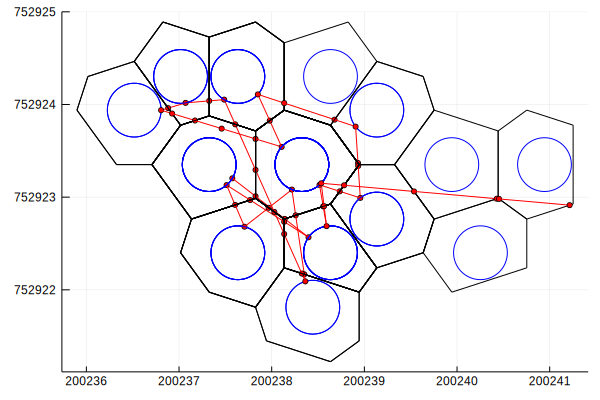

In [8]:
plot()
Inicio = 104;
Final = 150;
for i in Inicio:Final
    #Colocamos el obstáculo
    Centro_Obstaculo = Central_Obstacles[i];
    x(t) = Centro_Obstaculo[1] + Radio_Obstaculo*cos(t);
    y(t) = Centro_Obstaculo[2] + Radio_Obstaculo*sin(t);
    plot!(x, y, 0, 2π, leg=false, color="blue")
    
    #Colocamos la celda contenedora
    Vertices_Unicos_Celda = unique!(Vertices_Voronoi[i]);
    for j in 1:(length(Vertices_Unicos_Celda)-1)
        plot!([Vertices_Unicos_Celda[j][1], Vertices_Unicos_Celda[j+1][1]], [Vertices_Unicos_Celda[j][2], Vertices_Unicos_Celda[j+1][2]], color="black")
    end
    plot!([Vertices_Unicos_Celda[end][1], Vertices_Unicos_Celda[1][1]], [Vertices_Unicos_Celda[end][2], Vertices_Unicos_Celda[1][2]], color="black")
    
    #Visualizamos la posición de la partícula
    scatter!([Positions_Particle[i][1]], [Positions_Particle[i][2]], color="red", markersize=2.5)
    
    #Visualizamos la trayectoria de la partícula
    plot!([Positions_Particle[i][1], Positions_Particle[i+1][1]], [Positions_Particle[i][2], Positions_Particle[i+1][2]], color="red")
end
scatter!([Positions_Particle[Final+1][1]], [Positions_Particle[Final+1][2]], color="red", markersize=2.5)
plot!(legend = false, aspectratio=:equal)

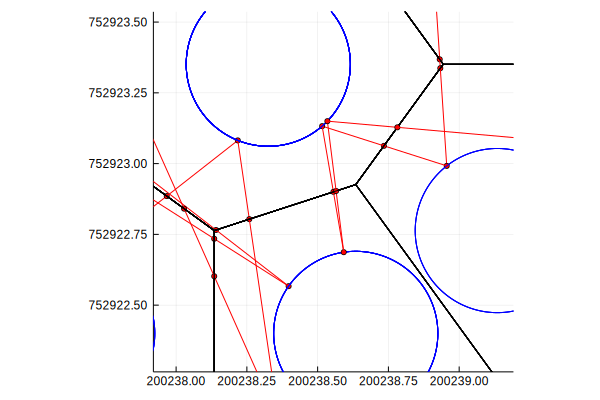

In [9]:

zoom = 0.6;
K = 143;
plot!(xlimits=[Positions_Particle[K][1]-zoom, Positions_Particle[K][1]+zoom], ylimits=[Positions_Particle[K][2]-zoom, Positions_Particle[K][2]+zoom])


##### Visualizate the MSD

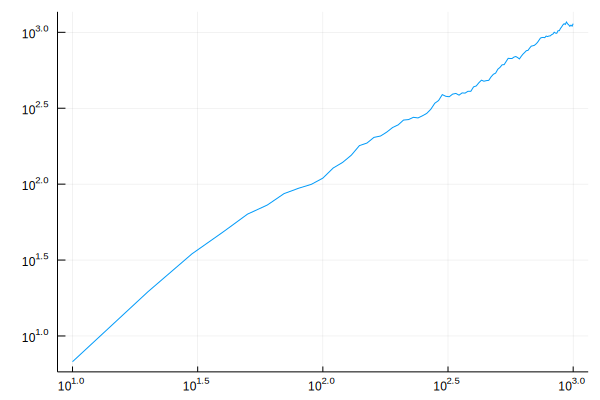

In [150]:
plot(Accumulated_Fly_Time, MSD_Array, key = false)
plot!(xscale = :log10, yscale = :log10)

# Zona de testeo